In [52]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import math

import utility.io_utility as io
import utility.animation_utility as anim

In [2]:
def burning(path):
    result = io.read(path)
    return np.sum(result[:,:,:,1], axis = (1,2))

In [3]:
def burned(path):
    result = io.read(path)
    return np.sum(result[:,:,:,5], axis = (1,2))

In [4]:
def burningPlusBurned(path):
    result = io.read(path)
    tmp = result[:,:,:,1] * result[:,:,:,5]
    return burning(path) + burned(path) - np.sum(np.where(tmp == 1, 1, 0), axis = (1,2)) # Abziehen was brennt + schon gebrannt hat

In [5]:
def derivative(array):
    x = np.arange(array.size)
    y = array
    y_ = np.diff(y) / np.diff(x)
    x_ = (x[:-1] + x[1:]) / 2
    return y_

In [6]:
def burning_radius(path):
    return np.sqrt(burningPlusBurned(path)/np.pi)

In [7]:
burningPlusBurned("data/result_output_burned")

array([1.000e+00, 3.000e+00, 6.000e+00, 1.100e+01, 1.900e+01, 3.100e+01,
       4.100e+01, 5.800e+01, 7.300e+01, 9.400e+01, 1.190e+02, 1.350e+02,
       1.510e+02, 1.750e+02, 2.040e+02, 2.390e+02, 2.640e+02, 3.000e+02,
       3.380e+02, 3.680e+02, 4.030e+02, 4.410e+02, 4.780e+02, 5.200e+02,
       5.640e+02, 5.950e+02, 6.300e+02, 6.760e+02, 7.180e+02, 7.740e+02,
       8.170e+02, 8.660e+02, 9.220e+02, 9.980e+02, 1.050e+03, 1.113e+03,
       1.177e+03, 1.232e+03, 1.296e+03, 1.365e+03, 1.449e+03, 1.523e+03,
       1.594e+03, 1.667e+03, 1.755e+03, 1.827e+03, 1.897e+03, 1.958e+03,
       2.025e+03, 2.082e+03])

In [8]:
def schwerpunkt(path):
    result = io.read(path)
    out = []
    t = 0
    while t < result[:,0,0,1].size:
        tmp = result[t,:,:,1] + result[t,:,:,5] - result[t,:,:,1] * result[t,:,:,5]
        (x, y) = np.where(tmp == 1)
        out.append(np.array([np.sum(x)/burningPlusBurned(path)[t], np.sum(y)/burningPlusBurned(path)[t]]))
        t = t+1
    
    return np.array(out)
#schwerpunkt(path)[t][y=1 x=0]

In [9]:
#gibt alle koordinaten der Brenndenen Zellen an
def koord(path):
    result = io.read(path)
    out = []
    for t in np.arange(result[:,0,0,1].size):
        tmp = result[t,:,:,1] + result[t,:,:,5] - result[t,:,:,1] * result[t,:,:,5]
        (x,y) = np.where(tmp ==1)
        out.append([x,y])
    #out[t][0 = x 1 = y][Zelle]  
    return out

In [49]:
def gradius(path,t):
    result = io.read(path)
    k = koord(path)
    s = schwerpunkt(path)
    time = np.arange(result[:,0,0,1].size)
    tmp = []
    
    
    for x in np.arange(k[t][0].size):      
        y = (k[t][0][x]-s[t][0])**2 + (k[t][1][x]-s[t][1])**2
        tmp.append([y])
        out = np.sum(tmp)/len(tmp)
    return out

In [51]:
gradius("data/result_output_burned", 4)

4.531855955678671

In [53]:
def radius(path):
    result = io.read(path)
    out = np.zeros([result[:,0,0,1].size])
    t = 0
    while t < result[:,0,0,1].size:
        out[t] = math.sqrt(gradius(path,t))
        t = t + 1
    return out

In [54]:
radius("data/result_output_burned")

array([ 0.        ,  0.81649658,  1.42400062,  1.56933423,  2.12881562,
        2.47862874,  3.01946885,  3.55080336,  3.84451024,  4.32900301,
        4.70729271,  4.94528638,  5.19027034,  5.57325391,  6.0141026 ,
        6.48853479,  6.79469017,  7.15334498,  7.58942867,  7.87773567,
        8.208616  ,  8.57547925,  8.927332  ,  9.31332871,  9.65543744,
        9.89638831, 10.18123066, 10.5334797 , 10.86461899, 11.25578192,
       11.55190027, 11.88898876, 12.2432703 , 12.73291124, 13.05525647,
       13.43372605, 13.79970862, 14.11482488, 14.47780125, 14.84538173,
       15.28776773, 15.66819479, 16.03205935, 16.40145124, 16.82070104,
       17.16309291, 17.47648242, 17.76404475, 18.06935269, 18.31786958])

In [14]:
def plot(array, name, color):
    y = array
    x = np.arange(y.size)
    plt.plot(x, y, color, label = "Model")
    plt.xlabel("Zeit [h]")
    plt.ylabel(name)
    #plt.legend()
    plt.grid()

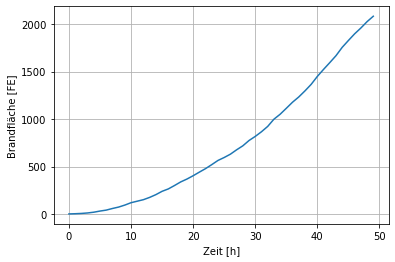

In [15]:
plot(burningPlusBurned("data/result_output_burned"), "Brandfläche [FE]", "C0")

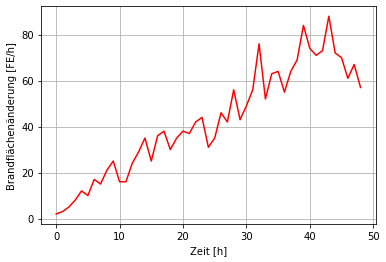

In [16]:
#plot(derivative(burning("data/result_output")), "Brandflächenänderung [FE/h]", "r")
plot(derivative(burningPlusBurned("data/result_output_burned")), "Brandflächenänderung [FE/h]", "r")

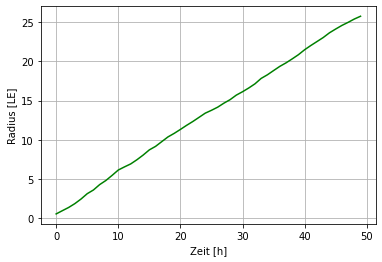

In [17]:
#plot(burning_radius("data/result_output"), "Radius [LE]", "green")
plot(burning_radius("data/result_output_burned"), "Radius [LE]", "green")

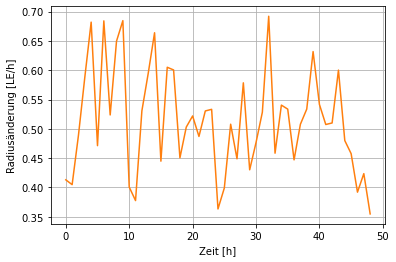

In [18]:
#plot(derivative(burning_radius("data/result_output")), "Radiusänderung [LE/h]", "C1")
plot(derivative(burning_radius("data/result_output_burned")), "Radiusänderung [LE/h]", "C1")

In [19]:
# anim.animate("data/result_output2")

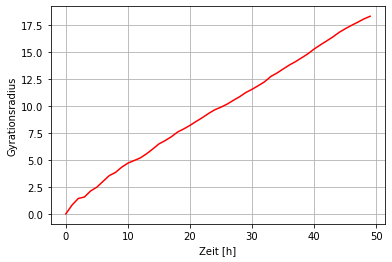

In [55]:
plot(radius("data/result_output_burned"), "Gyrationsradius", "r")

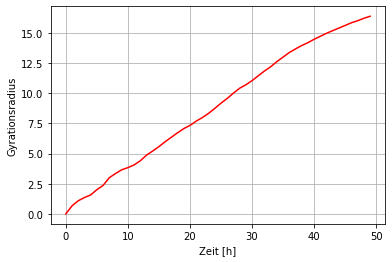

In [56]:
plot(radius("data/result_output_burned1"), "Gyrationsradius", "r")